In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time
from math import floor,inf
from sklearn.utils import shuffle
import seaborn as sns

In [3]:
###Folder where live predictions and probabilities were saved
folder = '5class tuned rhtng 8chan fpz bias hand control trials'

In [88]:
###Extract predictions and probabilities from saved data from trials
gestures = ['Pinch', 'Point', 'Hook', 'Tripod', 'Grasp']
predictions=np.array([])
probabilities = np.array([])
y = np.array([])
label = 0
for gesture in gestures:
    actual = np.ones(1000)*label
    y = np.append(y,actual)
    for trial in range(1,11):
        file = gesture + ' trial ' + str(trial) + ' class pred.csv'
        file2 = gesture + ' trial ' + str(trial) + ' class probabilities.npy'
        data = np.genfromtxt(folder + '\\' + file)[:]
        data2 = np.load(folder + '\\' + file2)
        predictions = np.append(predictions,data)
        probabilities = np.append(probabilities,data2)
    label+=1

In [89]:
####Reshape probabilities to be in more useful format
probabilities = probabilities.reshape((5000,5))

In [90]:
predictions.size  #predicted class

5000

In [91]:
y.size   #actual class

5000

In [92]:
len(probabilities)

5000

In [93]:
probabilities[0]

array([6.30947053e-01, 3.68754715e-01, 1.58376672e-08, 2.70447664e-09,
       2.98194471e-04])

In [179]:
###Sort correct and incorrect probabilities for each MI or EMG task
correct_prob = {'Right-hand': [], 'Tongue':[], 'Blinking':[], 'Eyebrow Raise':[], 'Teeth Clench':[]}
incorrect_prob = {'Right-hand': [], 'Tongue':[], 'Blinking':[], 'Eyebrow Raise':[], 'Teeth Clench':[]}
keys = ['Right-hand', 'Tongue', 'Blinking', 'Eyebrow Raise', 'Teeth Clench']
for i in range(len(predictions)):
    if predictions[i] != y[i]:
        incorrect_prob[keys[int(predictions[i])]].append(probabilities[i].max()) 
    else:
        correct_prob[keys[int(y[i])]].append(probabilities[i].max())

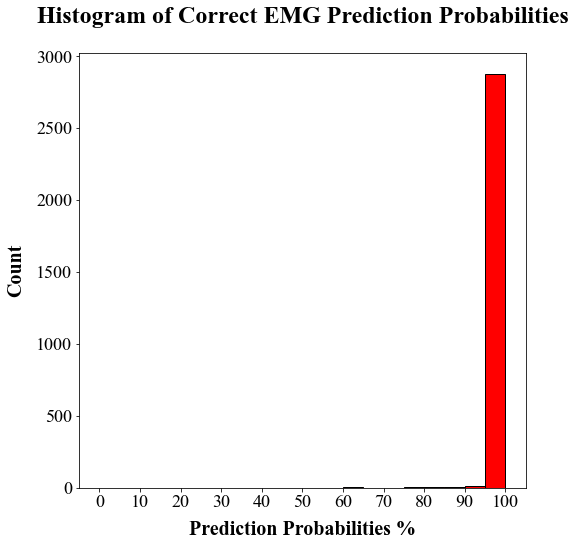

In [259]:
####Histogram of Correct EMG class prediction probabilities
emg_correct = np.concatenate((correct_prob['Blinking'], correct_prob['Eyebrow Raise'], correct_prob['Teeth Clench']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of Correct EMG Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(emg_correct, bins = 20, range = (0,1), histtype='bar',edgecolor = 'black', color = 'red')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'EMG correct predictions.png')

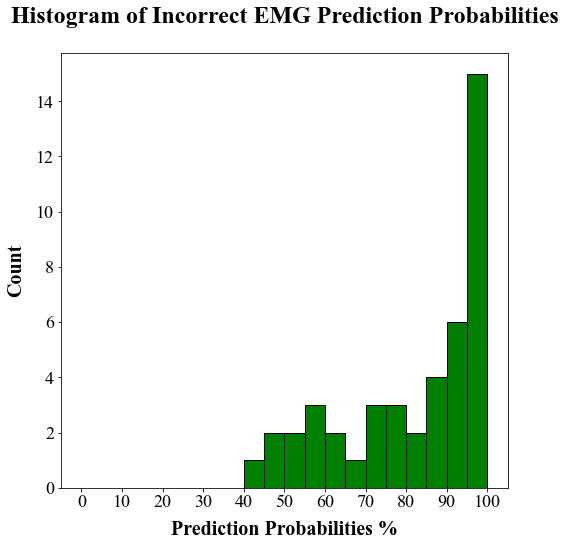

In [260]:
###Histogram of incorrect EMG class prediction probabilities
emg_incorrect = np.concatenate((incorrect_prob['Blinking'], incorrect_prob['Eyebrow Raise'], incorrect_prob['Teeth Clench']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of Incorrect EMG Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(emg_incorrect, bins = 20, range = (0,1), histtype='barstacked',edgecolor = 'black', color = 'green')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'EMG incorrect predictions.png')

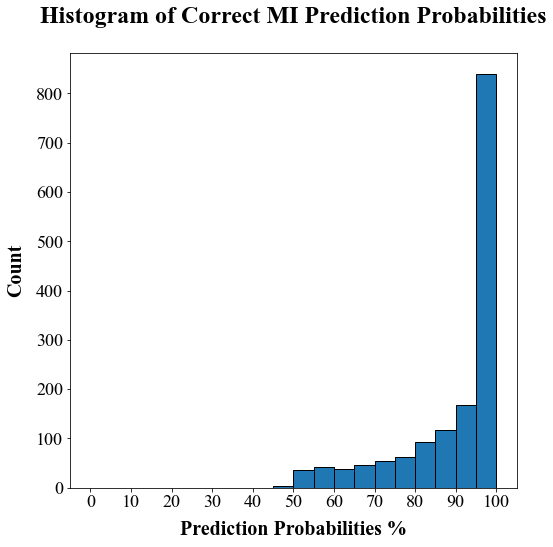

In [261]:
###Histogram of correct MI class prediction probabilities
mi_correct = np.concatenate((correct_prob['Right-hand'],correct_prob['Tongue']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of Correct MI Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(mi_correct, bins = 20, range = (0,1), histtype='bar',edgecolor = 'black')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'MI correct predictions.png')

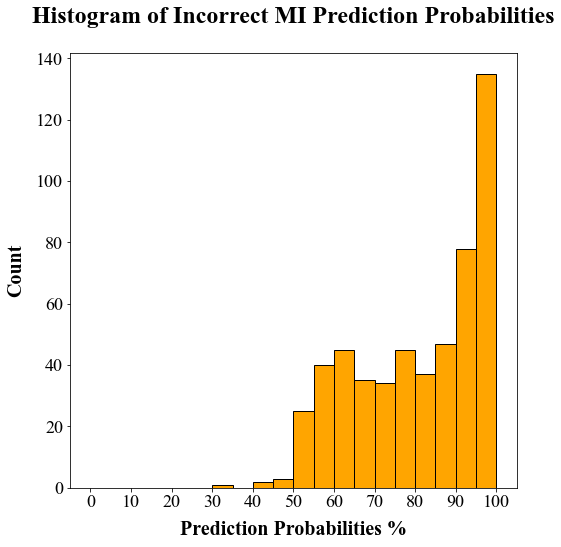

In [262]:
###Histogram of incorrect MI class prediction probabilities
mi_incorrect = np.concatenate((incorrect_prob['Right-hand'],incorrect_prob['Tongue']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of Incorrect MI Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(mi_incorrect, bins = 20, range = (0,1), histtype='bar',edgecolor = 'black', color='orange')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'MI incorrect predictions.png')

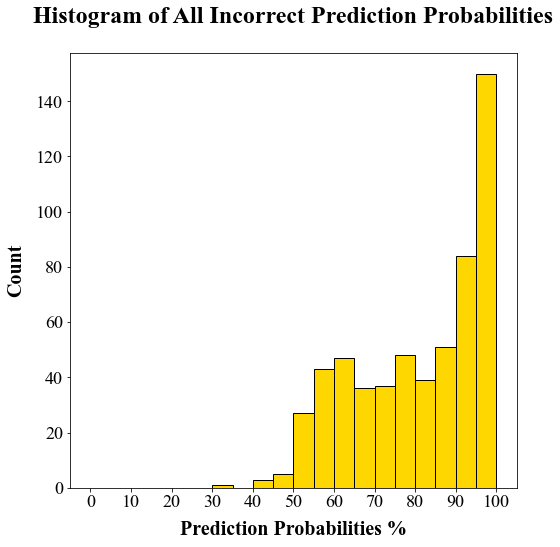

In [263]:
###Histogram of incorrect prediction probabilities for all classes (MI and EMG)
all_incorrect = np.concatenate((incorrect_prob['Right-hand'],incorrect_prob['Tongue'], incorrect_prob['Blinking'], incorrect_prob['Eyebrow Raise'], incorrect_prob['Teeth Clench']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of All Incorrect Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(all_incorrect, bins = 20, range = (0,1), histtype='bar',edgecolor = 'black', color='gold')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'ALL incorrect predictions.png')

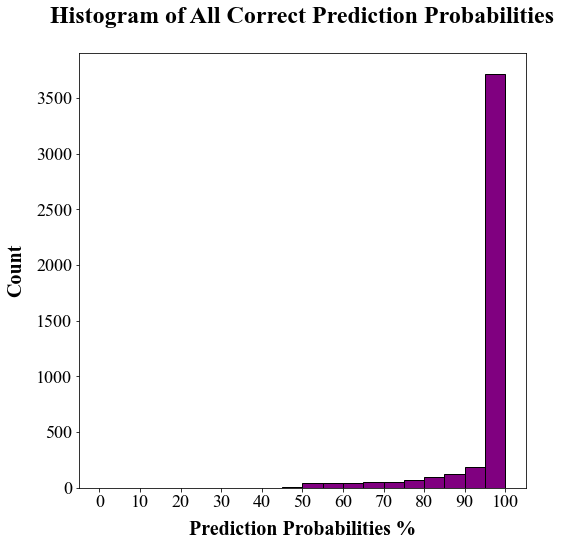

In [264]:
###Histogram of correct prediction probabilities for all classes (MI and EMG)
all_correct = np.concatenate((correct_prob['Right-hand'],correct_prob['Tongue'], correct_prob['Blinking'], correct_prob['Eyebrow Raise'], correct_prob['Teeth Clench']))
fig, ax = plt.subplots(figsize = (8,8))
plt.title('Histogram of All Correct Prediction Probabilities', pad=30, fontsize=24, fontweight='bold')
plt.xlabel('Prediction Probabilities %', fontweight='bold', fontsize=20, labelpad = 10)
plt.ylabel('Count', fontweight='bold', fontsize=20, labelpad = 10)
plt.hist(all_correct, bins = 20, range = (0,1), histtype='bar',edgecolor = 'black', color='purple')
#plt.legend(['Right-hand','Tongue'],frameon=False)
plt.rcParams["font.family"] = "Times New Roman"
plt.xticks(ticks= [i/10 for i in range(0,11)], fontsize=18)
plt.yticks(fontsize=18)
ax.set_xticklabels([i*10 for i in range(0,11)])
plt.show()
fig.savefig('Histograms\\' + 'ALL correct predictions.png')

In [ ]:
######Mean and Median prediction probabilities:

In [59]:
###Extract all correct and incorrect prediction probabilities
conf = []
conf2 = []
bad_pred = []
good_pred = []
for array in incorrect_prob:
    conf.append(array.max())
    bad_pred.append(np.argmax(array))
for array in correct_prob:
    conf2.append(array.max())
    good_pred.append(np.argmax(array))

In [60]:
#Mean incorrect prediction probaility
np.mean(conf)

0.8101930987814053

In [61]:
#Median incorrect prediction probaility
np.median(conf)

0.8451963067054749

In [62]:
#Mean correct prediction probability
np.mean(conf2)

0.9638947979487154

In [63]:
#Median correct prediction probability
np.median(conf2)

0.9999985694885254

In [135]:
#Save Incorrect and correct prediction probabilities
np.savetxt('Online Incoorect Prediction Probabilities.csv', conf)

In [136]:
np.savetxt('Online Correct Prediction Probabilities.csv', conf2)

In [147]:
sum(i<0.97 for i in conf)/len(conf) #% of incorrect predictions with probability below 0.97 (unused)

0.8056042031523643

In [141]:
#classification report for live hand control trials
print(classification_report(y,predictions,digits=3))

              precision    recall  f1-score   support

         0.0      0.690     0.871     0.770      1000
         1.0      0.823     0.632     0.715      1000
         2.0      0.982     0.985     0.984      1000
         3.0      1.000     0.945     0.972      1000
         4.0      0.975     0.996     0.985      1000

    accuracy                          0.886      5000
   macro avg      0.894     0.886     0.885      5000
weighted avg      0.894     0.886     0.885      5000



In [142]:
#Confusion matrix for live hand control trials
print(confusion_matrix(y,predictions))

[[871 112   0   0  17]
 [363 632   0   0   5]
 [  9   6 985   0   0]
 [ 18  15  18 945   4]
 [  1   3   0   0 996]]


In [147]:
labels=['Right Hand', 'Tongue', 'Blinking', 'Eyebrow Raise', 'Teeth Clench']

In [150]:
#Confusion matrix labels
group_counts = ['{0:0.0f}'.format(value) for value in
                confmat.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confmat.flatten()/np.sum(confmat)]
conf_labels = [f'{v1}\n\n{v2}' for v1, v2 in
          zip(group_counts,group_percentages)]
conf_labels = np.asarray(conf_labels).reshape(confmat.shape)

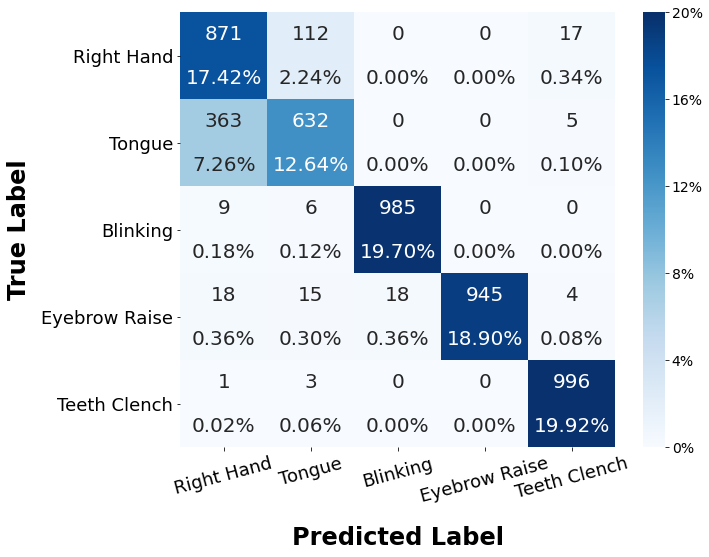

In [155]:
#Generate Confusion Matrix
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(10,8))
confusion = sns.heatmap(confmat/np.sum(confmat), annot=conf_labels, annot_kws={'fontsize':20},vmin=0, vmax=1/len(labels), 
            fmt='', cmap='Blues', xticklabels=labels,yticklabels=labels, square=True, ax=ax, cbar_kws = {'ticks':np.arange(0,1 + 1/5,1/5)/len(labels)})
confusion.set_xticklabels(labels, fontsize=18, rotation=15)
confusion.set_yticklabels(labels, fontsize=18, rotation=0)
confusion.set_ylabel('True Label', fontsize=24, labelpad=10, weight='bold')
confusion.set_xlabel('Predicted Label', fontsize=24, labelpad=20, weight='bold')
plt.rcParams["font.family"] = "Sans Serif"
#confusion.set_title('Confusion Matrix', fontsize=22)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=14)
cbar.ax.yaxis.set_major_formatter(PercentFormatter(1, 0))
plt.show()

In [156]:
#Save confusion matrix
fig.savefig('Confusion Matrices\\' + '5classRHTNGMIEMGOnline.png', bbox_inches='tight')

In [ ]:
######Estimates of time taken to make a prediction and send a command to the hand from SEQUENCE TRIALS#####

In [4]:
#Folder where recorded predictions times were saved
folder = '5class tuned rhtng 8chan fpz bias hand control sequence'

In [5]:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 2 times.csv')
times.mean()

0.13710362045945448

In [6]:
times2 = np.genfromtxt(folder + '\\' + 'Sequence trial 3 times.csv')
times2.mean()

0.14523664273713766

In [7]:
times3 = np.genfromtxt(folder + '\\' + 'Sequence trial 4 times.csv')
times3.mean()

0.1502410628254574

In [8]:
times4 = np.genfromtxt(folder + '\\' + 'Sequence trial 5 times.csv')
times4.mean()

0.14252584191817272

In [9]:
times5 = np.genfromtxt(folder + '\\' + 'Sequence trial 6 times.csv')
times5.mean()

0.1388035985800597

In [ ]:
###Times above were skewed:
###System was slow initially for approx. 17 predictions before it stabilised and prediction times were similar
###Thus, mean times were calculated after this slow starting up period

In [23]:
#### there was also a one second delay inserted after blinking was detected, thus the response time was unusually slow,
#### this time was removed from the analysis:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 2 times.csv')[17:]
times.mean()
new_times = []
for time in times:
    if time<1:    #rejects times longer than 1 sec
        new_times.append(time)
np.mean(new_times)

0.12525233986613515

In [24]:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 3 times.csv')[17:]
times.mean()
new_times = []
for time in times:
    if time<1:
        new_times.append(time)
np.mean(new_times)

0.1271891620306842

In [25]:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 4 times.csv')[17:]
times.mean()
new_times = []
for time in times:
    if time<1:
        new_times.append(time)
np.mean(new_times)

0.12648513652285467

In [26]:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 5 times.csv')[17:]
times.mean()
new_times = []
for time in times:
    if time<1:
        new_times.append(time)
np.mean(new_times)

0.12714489002143387

In [27]:
times = np.genfromtxt(folder + '\\' + 'Sequence trial 6 times.csv')[17:]
times.mean()
new_times = []
for time in times:
    if time<1:
        new_times.append(time)
np.mean(new_times)

0.12599605884192125

In [28]:
####Mean time to process EEG, make a prediction and send a command to the hand
np.mean([0.12525233986613515,0.1271891620306842,0.12648513652285467,0.12714489002143387,0.12599605884192125])

0.12641351745660584

In [ ]:
###Time taken to process EEG segment and make a prediction

In [17]:
filter_times1 = np.genfromtxt(folder + '\\' + 'Sequence trial 2 predandfilt times.csv')[17:]
filter_times1.mean()

0.044229031911964624

In [18]:
filter_times2 = np.genfromtxt(folder + '\\' + 'Sequence trial 3 predandfilt times.csv')[17:]
filter_times2.mean()

0.04712510108947754

In [19]:
filter_times3 = np.genfromtxt(folder + '\\' + 'Sequence trial 4 predandfilt times.csv')[17:]
filter_times3.mean()

0.04621225409209728

In [20]:
filter_times4 = np.genfromtxt(folder + '\\' + 'Sequence trial 5 predandfilt times.csv')[17:]
filter_times4.mean()

0.04705704432347671

In [21]:
filter_times5 = np.genfromtxt(folder + '\\' + 'Sequence trial 6 predandfilt times.csv')[17:]
filter_times5.mean()

0.04552898194806637

In [22]:
###Mean Prediction Time
np.mean([filter_times1.mean(), filter_times2.mean(), filter_times3.mean(), filter_times4.mean(), filter_times5.mean()])

0.0460304826730165